<b>Входные данные — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, предоставленный сервисом Яндекс Недвидимость.<br><br>
Цель работы — выявить особенности и зависимости, которые существуют на рынке недвижимости.<br>
<br>
В ходе работы будет проведена обработка данных будут изучены и проанализированы сами данные.<b>

In [917]:
import pandas as pd
import matplotlib.pyplot as plt

### Открытие файла с данными и изучение общей информации. 

In [941]:
df = pd.read_csv('data_project_3.csv', delimiter = '\t')

In [942]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [944]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Выводы по основным характеристикам**<br><br>
**total_images** ✔<br>
**last_price** 1.219000e+04 = 12190 крайне низкая цена; 7.630000e+08 = 763млн - слишком высокая цена (но в теории допустимо)<br>
**total_area** 12м^2 - крайне малая площадь, 900м^2 - крайне большая площадь<br>
**rooms** 0 комнат допустимо только в случае студии, 19 комнат - аномально большое значение<br>
**ceiling_height** 1 и 100 метров - минимальная и максимальная высота потолков соответственно - очевидные выбросы<br>
**floors_total** ✔<br>
**living_area** минимальная площадь - 2м^2, выброс <br>
**floor** ✔<br>
**kitchen_area** минимальная площадь - 1.3м^2, выброс максимальная площадь - 112м^2, выброс<br>
**balcony** 5 балконов - подозрительно много<br>
**airports_nearest** минимальное расстояние - 0м, выброс<br>
**cityCenters_nearest** ✔<br>
**parks_around3000** ✔<br>
**parks_nearest** ✔<br>
**ponds_around3000** ✔<br>
**ponds_nearest** ✔<br>
**days_exposition** 1 день - аномально быстро, 1580 дней - аномально долго<br><br>

В целом можно заметить большое количество аномальных значений, которые тем не менее, не следует удалять, ведь такие значения являются теоретически возможными, просто цена на такие объекты будет соответствующей.

Однако, как уже было сказано ранее, эти замечания касаются лишь недвижимости с теоретически возможными характеристиками. Жильё, данные о котором абсурдны очевидно необходимо исключить, либо изменить данные.

In [945]:
df.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

In [946]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [947]:
df.duplicated().sum()

0

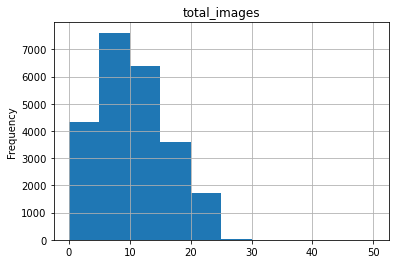

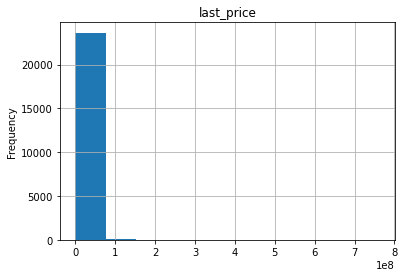

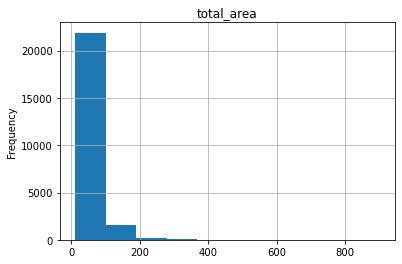

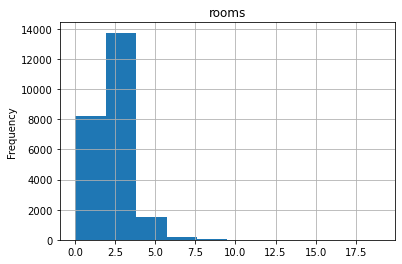

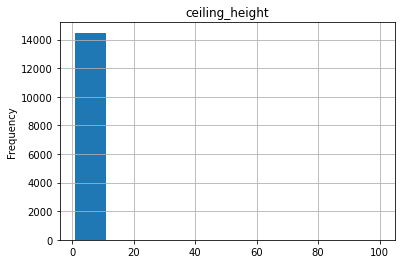

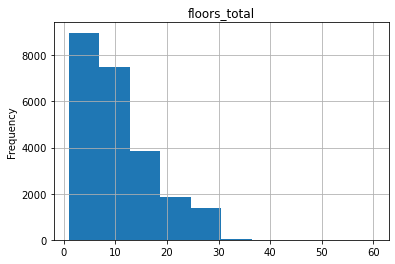

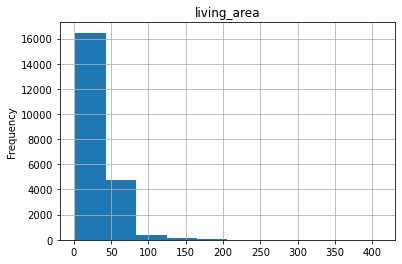

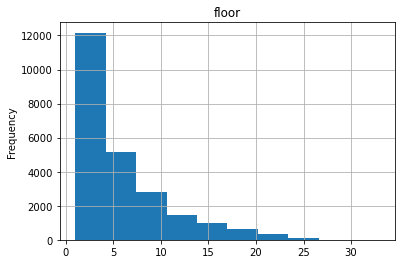

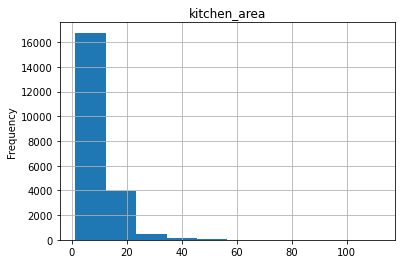

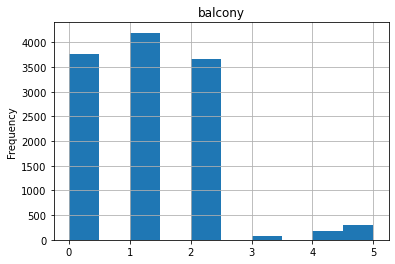

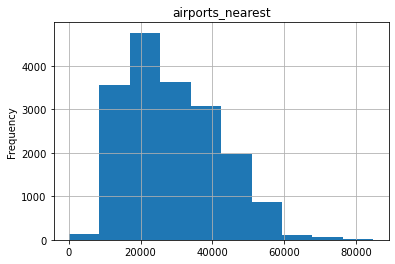

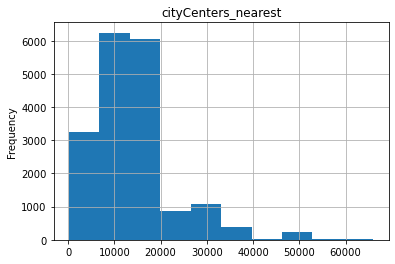

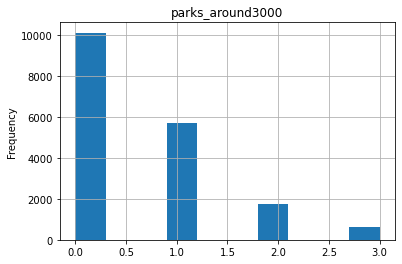

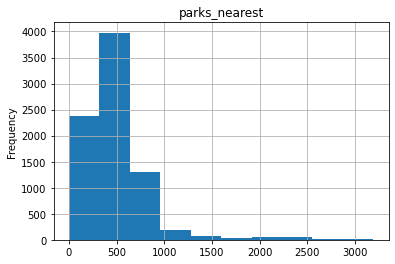

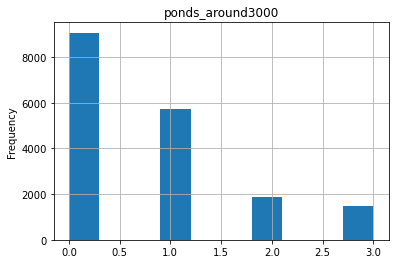

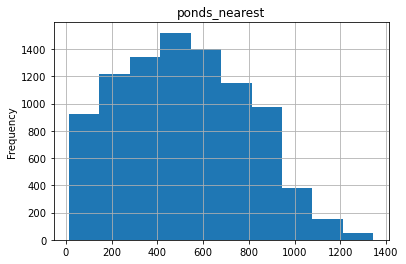

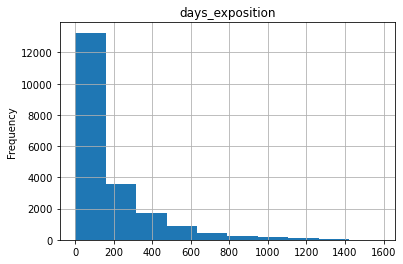

In [948]:
for i in ['total_images', 'last_price', 'total_area',
          'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
          'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
          'parks_around3000', 'parks_nearest', 'ponds_around3000',
          'ponds_nearest', 'days_exposition']:
    df[i].plot(title = i, grid = True, kind = 'hist')
    plt.show()

Проанализировав построенные графики можно сказать, что гипотеза о малом чисде выбросов подтверждается, значит, аномальные значения должны подлежать исключению

### Предобработка данных

In [949]:
df.rename(columns = {'cityCenters_nearest': 'city_centers_nearest',
                     'parks_around3000': 'parks_around_three_km',
                     'ponds_around3000': 'ponds_around_three_km'}, inplace = True)
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_three_km', 'parks_nearest', 'ponds_around_three_km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В столбце is_apartment слишком много пропущенных значений.<br>
Можно предположить, что пустые ячейки не являются апартаментами. Проведём проверку: недвижимость в апартаментах стоит на много дешевле, таким образом, в случае, если средняя цена сильно изменится, необходимо будет найти иной способ замены данных, либо убедиться, что данные менять не стоит.

In [950]:
print('До замены: \n',
      'Отношение цены: \n', df.groupby(['is_apartment']).agg({'last_price': 'mean'}),'\n',
      'Отношение данных:', df.groupby('is_apartment')['is_apartment'].count(), '\n',
      'Тип данных:', df['is_apartment'].dtypes)

df['is_apartment'].fillna(False, inplace=True)

print('После замены: \n',
      'Отношение цены \n', df.groupby(['is_apartment']).agg({'last_price': 'mean'}),'\n',
      'Отношение данных:', df.groupby('is_apartment')['is_apartment'].count(), '\n',
      'Тип данных:', df['is_apartment'].dtypes)

До замены: 
 Отношение цены: 
                 last_price
is_apartment              
False         6.522225e+06
True          1.292420e+07 
 Отношение данных: is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64 
 Тип данных: object
После замены: 
 Отношение цены 
                 last_price
is_apartment              
False         6.528054e+06
True          1.292420e+07 
 Отношение данных: is_apartment
False    23649
True        50
Name: is_apartment, dtype: int64 
 Тип данных: bool


Как можно заметить, средняя цена после замены осталась практически неизменной. Можно заключить, что замена выполнена верно.

In [951]:
# Замена типа столбца first_day_exposition с str на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [952]:
df.isna().sum().sort_values(ascending = False)

parks_nearest            15620
ponds_nearest            14589
balcony                  11519
ceiling_height            9195
airports_nearest          5542
city_centers_nearest      5519
parks_around_three_km     5518
ponds_around_three_km     5518
days_exposition           3181
kitchen_area              2278
living_area               1903
floors_total                86
locality_name               49
rooms                        0
last_price                   0
total_area                   0
first_day_exposition         0
studio                       0
floor                        0
is_apartment                 0
open_plan                    0
total_images                 0
dtype: int64

Рассмотрим попарно столбцы parks_around_three_km, parks_nearest и ponds_around_three_km, ponds_nearest:

|Column|Non-Null|Count|Dtype|
|------|--------|-----|-----|
|parks_around_three_km|18181|non-null|float64|
|parks_nearest|8079|non-null|float64|
|ponds_around_three_km|18181|non-null|float64|
|ponds_nearest|9110|non-null|float64|

Разница в количестве пустых ячеек достаточно существенна.
Вероятно их можно сократить. Для этого оценим количество парков и прудов в радиусе 3км от места жительства:

In [953]:
display(df.pivot_table(index = 'parks_around_three_km', values = 'parks_nearest', aggfunc = 'count'))
df.pivot_table(index = 'ponds_around_three_km', values = 'ponds_nearest', aggfunc = 'count')

,parks_nearest
parks_around_three_km,
0.0,4
1.0,5681
2.0,1747
3.0,647


,ponds_nearest
ponds_around_three_km,
0.0,0
1.0,5717
2.0,1892
3.0,1501


По данным хорошо видно, что общее количество прудов и парков явно уступает их числу в числе парков и прудов в радиусе 3км от каждого места жительства. У этого может быть несколько причин:
1. Пруды и парки сконцентрированы в большом количестве на какой-то территории, превосходящей три километра и расстояние до них слишком далеко и не учитывается.
2. В данных ошибка и часть информации утеряна.
<br>Проведём проверку:

In [954]:
def parks_nearest(row):
    """
    Функция принимает на вход строку датафрейма. Проверяет столбец со значениями о расстоянии до ближайшего парка.
    В случае, когда в радиусе трёх километров существует парк, но расстояние до него не указано, 
    значение расстояния заменяется на среднеепо столбцу. 
    """
    if row['parks_around_three_km'] != 0 and not pd.isna(row['parks_around_three_km']) and pd.isna(row['parks_nearest']):
        row['parks_nearest'] = df['parks_nearest'].mean()
        return row['parks_nearest']
    
    
def parks_around3000(row):
    """
    Функция принимает на вход строку датафрейма. Проверяет столбец со значениями о количестве парков в радиусе трёх километров.
    В случае, когда расстояние до ближайшего парка менее трёх километров, но число парков в этом радиусе равно нулю,
    либо значение отсутствует, это значение становится равно 1.
    """
    if not pd.isna(row['parks_nearest']) and pd.isna(row['parks_around_three_km']) and row['parks_nearest'] <= 3000:
        row['parks_around_three_km'] = 1
        return row['parks_around_three_km']

    
def ponds_nearest(row):
    """
    Функция принимает на вход строку датафрейма. Проверяет столбец со значениями о расстоянии до ближайшего пруда.
    В случае, когда в радиусе трёх километров существует пруд, но расстояние до него не указано, 
    значение расстояния заменяется на среднее по столбцу. 
    """
    if row['ponds_around_three_km'] != 0 and not pd.isna(row['ponds_around_three_km']) and pd.isna(row['ponds_nearest']):
        row['ponds_nearest'] = df['ponds_nearest'].mean()
        return row['ponds_nearest']
    
    
def ponds_around3000(row):
    """
    Функция принимает на вход строку датафрейма. Проверяет столбец со значениями о количестве прудов в радиусе трёх километров.
    В случае, когда расстояние до ближайшего пруда менее трёх километров, но число прудов в этом радиусе равно нулю,
    либо значение отсутствует, это значение становится равно 1.
    """
    if not pd.isna(row['ponds_nearest']) and pd.isna(row['ponds_around_three_km']) and row['ponds_nearest'] <= 3000:
        row['ponds_around_three_km'] = 1
        return row['ponds_around_three_km']


df['parks_nearest'] = df.apply(lambda row: parks_nearest(row) if pd.isna(row['parks_nearest']) else row['parks_nearest'], axis=1)
df['parks_around_three_km'] = df.apply(lambda row: parks_around3000(row) if pd.isna(row['parks_around_three_km']) else row['parks_around_three_km'], axis=1)

df['ponds_nearest'] = df.apply(lambda row: parks_nearest(row) if pd.isna(row['ponds_nearest']) else row['ponds_nearest'], axis=1)
df['ponds_around_three_km'] = df.apply(lambda row: parks_around3000(row) if pd.isna(row['ponds_around_three_km']) else row['ponds_around_three_km'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  float64       
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         14504 non-null  float64       
 6   floors_total           23613 non-null  float64       
 7   living_area            21796 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           23699 non-null  bool          
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           21421 non-null  float64       
 13  b

Ничего не изменилось, оставляем данные прежними.

Очень много значений пропущено в столбце balcony, значения стоит заменить на 0. <br>
Следует заменить именно на 0 из соображения о том, что с наибольшей вероятностью пользователи в чьих квартирах нет балконов, не заполняют эту графу

In [955]:
df['balcony'].fillna(0, inplace=True)
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Начнём с рассмотрения подозрительной недвижимости, находившейся непосредственно в аэропорту

In [956]:
df[df['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,False,False,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


В целом у помещения нет никаких выбивающихся характеристик, за исключением упомянутой выше. Скорее всего, её стоит списать на ошибку человеческого фактора. <br>
Заменим значение в столбце airports_nearest на среднее по этому столбцу в зависимости от привязки к местности.

In [957]:
df.loc[(df.airports_nearest == 0), 'airports_nearest'] = df.loc[(df.locality_name == 'Санкт-Петербург'), 'airports_nearest'].mean()
print('Значение ячейки после преобразования:', df.loc[21085, 'airports_nearest'])
df['airports_nearest'].min()

Значение ячейки после преобразования: 28046.18623688923


6450.0

Рассмотрим следующий столбец, вызвавший подозрения - ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

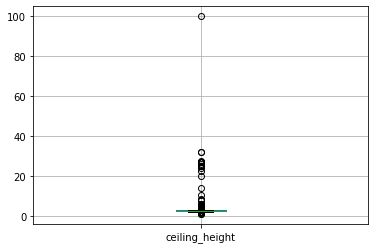

In [958]:
print(df['ceiling_height'].describe())
df.boxplot('ceiling_height')

Полученный ящик с усами крайне необычен. максимальное значение является бозоговорочным выбросом.
Существует несколько причин, по которым можно принять такое значение:
1. Человек указал значение в см
2. Человек указал значение в дм
<br>
Однако в первом случае высота помещения становится 1 метр, что так же невозможно, а во втором случае высота становится 10 метров, что так же недопустимо. <br>
Удалим Это значение и рассмотрим график подробнее.

In [959]:
 df.shape[0]

23699

In [960]:
ceiling_height = df['ceiling_height']
ceiling_height.head()

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
Name: ceiling_height, dtype: float64

In [961]:
before_drop = len(ceiling_height)
ceiling_height.drop(ceiling_height[ceiling_height == 100].index, inplace = True)
after_drop = len(ceiling_height)
print(f'Было: {before_drop} \nСтало: {after_drop} \nЗначений убрано:{before_drop-after_drop}')
df['ceiling_height'].max()

Было: 23699 
Стало: 23698 
Значений убрано:1


100.0

count    14503.000000
mean         2.764795
std          0.968741
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

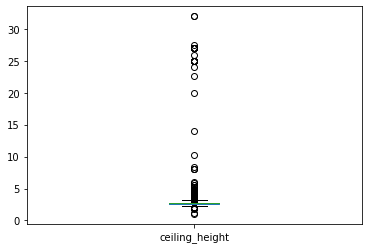

In [963]:
print(ceiling_height.describe())
ceiling_height.plot.box()

В данных хорошо просматривается скопление аномальных значений в районе 22 - 28 метров. Рассмотри эти значения подробнее.

In [965]:
ceiling_height[ceiling_height > 20].sort_values(ascending = False)

22336    32.0
3148     32.0
21377    27.5
22938    27.0
4876     27.0
5246     27.0
5807     27.0
10773    27.0
17857    27.0
20478    27.0
21824    27.0
5669     26.0
14382    25.0
11285    25.0
9379     25.0
6246     25.0
18545    25.0
4643     25.0
355      25.0
5076     24.0
20507    22.6
Name: ceiling_height, dtype: float64

Значения действительно подозрительны. практически все представляют из себя целую часть в метрах.<br>
Более того, рассмторим значения ящика с усами:<br>
Q1 = 2.52м = 25.2дм<br>
Q2 = 2.8м = 28дм<br>
Таким образом, можно допустить, что значения, расположенные в рассматриваемом диапазоне, не являются выбросами, они лишь указаны не в тех единицах измерения.<br>
Приведём к нормальному виду, для этого все значения диапазона необходимо сократить в 10 раз.

In [966]:
# df['ceiling_height'].where(~(df.ceiling_height > 20), other /= 10, inplace = True)
# df.loc[(df.ceiling_height > 20), 'ceiling_height'] = df.loc[(df.ceiling_height > 20), 'ceiling_height']/10
# df['ceiling_height'].max()
ceiling_height[ceiling_height > 20] = ceiling_height[ceiling_height > 20]/10
ceiling_height.max()

20.0

count    14503.000000
mean         2.730348
std          0.345248
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

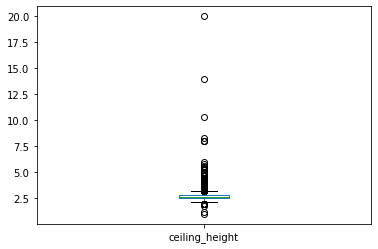

In [967]:
print(ceiling_height.describe())
ceiling_height.plot.box()

Аномалий стало меньше, однако они всё ещё есть. Исправить такие значения возможным уже не представляется, поэтому принято решение устранить их. <br>
Нормальные значения ящика с усами находятся в диапазоне от 2.51 до 2.8 метров. прочие значения удалим из таблицы.

Было: 10906 
Стало: 10853 
Значений убрано:53
count    10853.000000
mean         2.795026
std          0.257419
min          2.510000
25%          2.600000
50%          2.700000
75%          2.900000
max          4.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

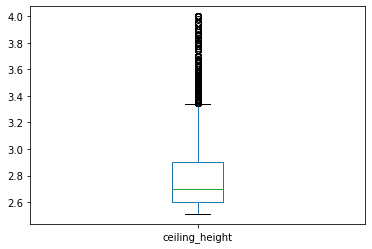

In [970]:
# before_drop = df.shape[0]
# df.query('2.51 <= ceiling_height <= 4', inplace = True)
# after_drop = df.shape[0]
# print(f'Было: {before_drop} \nСтало: {after_drop} \nЗначений убрано:{before_drop-after_drop}')
# print(df['ceiling_height'].describe())
# df.boxplot('ceiling_height')
before_drop = len(ceiling_height)

ceiling_height = ceiling_height[(ceiling_height >= 2.51)&(ceiling_height <= 4)]

after_drop = len(ceiling_height)
print(f'Было: {before_drop} \nСтало: {after_drop} \nЗначений убрано:{before_drop-after_drop}')
print(ceiling_height.describe())
ceiling_height.plot.box()

Рассмотрим случай с комнатами. Если в помещении 0 комнат и помещение не является студией, оно должно быть исключено.

In [971]:
strange_rooms_before = df[(df['rooms'] == 0) & (df['studio'] == True)]['studio'].count()
df.drop(df[(df['rooms'] == 0) & (df['studio'] == True)].index, inplace = True)
strange_rooms_after = df[(df['rooms'] == 0) & (df['studio'] == True)]['studio'].count()
print('Устранено аномалий:', strange_rooms_before - strange_rooms_after)

Устранено аномалий: 138


Дубликаты в названиях

In [972]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [973]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'городской посёлок Советский', 'городской посёлок Фёд

In [974]:
def find_short_names(strings):
    """
    Находит первое вхождение заглавной буквы и 
    на выходе предоставляет всё, что было в строке за ней (включая саму букву).
    """
    result = []
    for string in strings:
        try:
            for i, j in enumerate(string):
                if j.isupper():
                    result.append(string[i:])
                    break
        except:
            continue
    return result


full_names = df['locality_name'].unique()
short_names = pd.Series(find_short_names(full_names))
short_names.head()

0    Санкт-Петербург
1             Шушары
2            Янино-1
3          Парголово
4             Мурино
dtype: object

In [975]:
short_names[short_names.duplicated()]

48            Мурино
55           Кудрово
90           Павлово
106      Фёдоровское
158            Рахья
177           Рябово
183              Мга
185       Никольское
219          Павлово
222           Рощино
230      Лесогорский
236          Щеглово
239           Вещево
248            Назия
255    Приветнинское
261        Советский
266           Любань
268         Зимитицы
279        Гарболово
292    Большая Ижора
304          Громово
307         Калитино
309     Приладожский
315         Рабитицы
325           Лесное
dtype: object

In [976]:
df = df.replace({'locality_name': {'Кудрово': 'деревня Кудрово',
                                   'Мурино': 'посёлок Мурино',
                                   'городской посёлок Рощино': 'посёлок городского типа Рощино',
                                   'посёлок Рябово': 'посёлок городского типа Рябово',
                                   'городской посёлок Советский': 'посёлок городского типа Советский',
                                   'городской посёлок Мга': 'посёлок городского типа Мга',
                                   'посёлок станции Приветнинское': 'посёлок при железнодорожной станции Приветнинское'}})

In [977]:
# Должны остаться только не включенные в список
full_names = df['locality_name'].unique()
short_names = pd.Series(find_short_names(full_names))
short_names[short_names.duplicated()]

88           Павлово
104      Фёдоровское
156            Рахья
181       Никольское
215          Павлово
225      Лесогорский
231          Щеглово
234           Вещево
243            Назия
259           Любань
261         Зимитицы
272        Гарболово
285    Большая Ижора
297          Громово
300         Калитино
302     Приладожский
308         Рабитицы
318           Лесное
dtype: object

In [978]:
df.reset_index(inplace = True)
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Подсчёт и добавление в таблицу новых столбцов

In [979]:
# цена одного квадратного метра
df['square_meter_price'] = (df['last_price']/df['total_area']).round()
df.head(3)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter_price
0,0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0


In [980]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday #apply(lambda day: day.weekday())

In [981]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [982]:
df['year_exposition'] = df['first_day_exposition'].dt.year

In [983]:
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018


In [984]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [985]:
df['floor_type'] = df.apply(floor_type, axis = 1)

In [986]:
df['city_centers_nearest_km'] = (df['city_centers_nearest']/1000).round()

In [987]:
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
1,1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый,19.0
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0


### Проведение исследовательского анализа данных

In [988]:
def plotting_for_analysis(column):
    """
    Выводит основные характеристики.
    Строит гистограмму.
    """
    print(df[column].describe())
    
    q1 = df[column].describe()['25%']
    q3 = df[column].describe()['75%']
    iqr = q3 - q1

    df[column].hist(range = (q1-1.5*iqr, q3+1.5*iqr), bins = 20, figsize = (10,8))
    plt.xlabel(column)
    plt.ylabel('flats number')
    plt.show()

count    23561.000000
mean        60.539209
std         35.663513
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


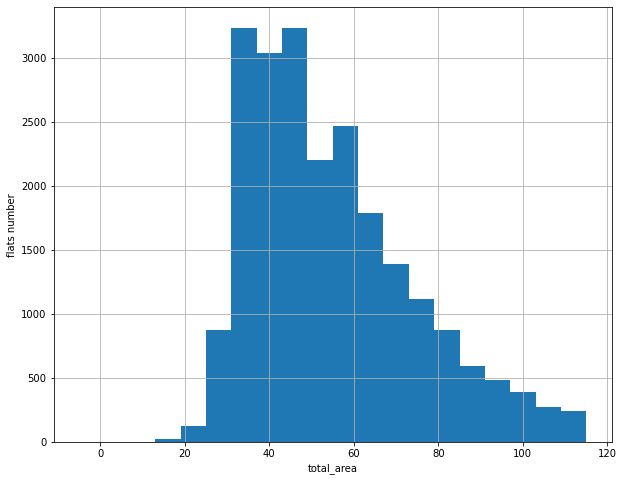

In [989]:
# общая площадь
plotting_for_analysis('total_area')

Можно выделить несколько пунктов:
1. Наибольшее количество квартир имеет площадь приблизительно от 35 до 65 метров.
2. Число квартир с площадью менее 30 и более 100 метров сильно уступает числу квартир с прочей площадью
3. В целом график представляет из себя распределение Пуассона достаточно близкое к нормальному

count    21668.000000
mean        34.549253
std         22.055725
min          2.000000
25%         18.700000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64


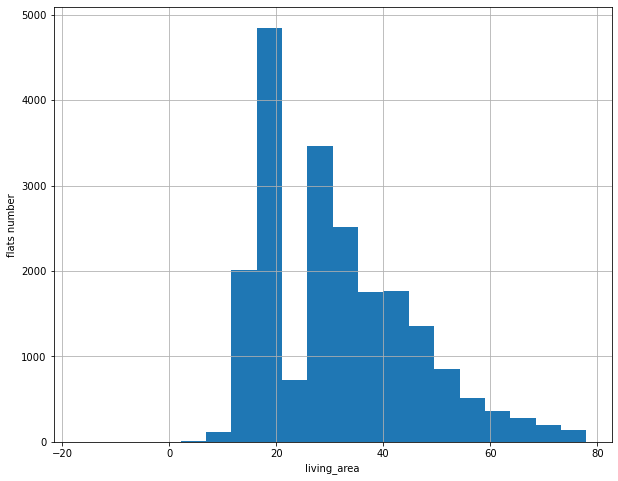

In [990]:
# жилая площадь
plotting_for_analysis('living_area')

1. Наибольшее число значений лежит в диапазоне от 15 до 35 метров, при чем квартир с жилой площадью приблизительно 25 метров сильно меньше, чем квартир с площадью около 20 и 30 метров
2. Больше всего квартир с жилой площадью около 20 метров.
3. Редкие показатели: квартиры с жилой площадью менее 15 метров и более 60

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


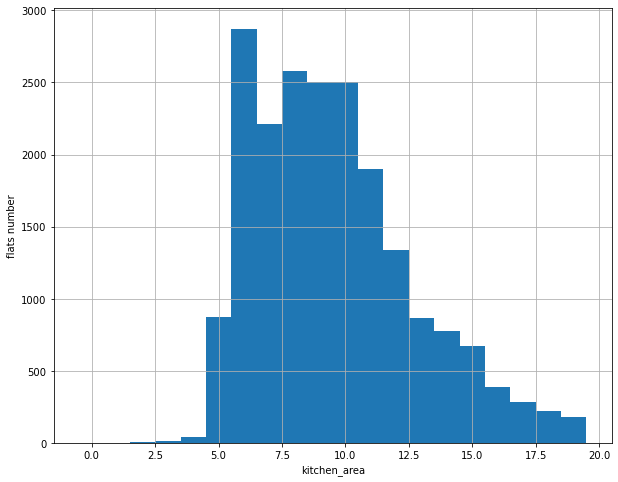

In [991]:
# площадь кухни
plotting_for_analysis('kitchen_area')

1. Площадь кухни от 5,5 до 12 метров является самым популярным вариантомю
2. Больше всего кухонь с площадью 10 метров
3. Редкие показатели: кухни с площадью меньше 5 и больше 12,5 метров

count    2.356100e+04
mean     6.561750e+06
std      1.091495e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


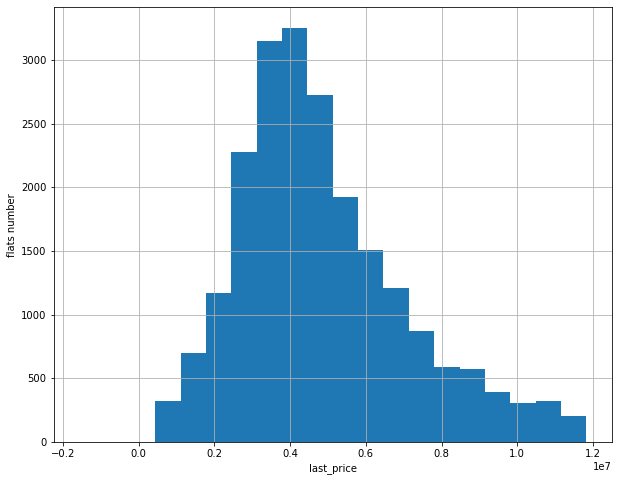

In [992]:
# цена объекта
plotting_for_analysis('last_price')

1. Больше всего квартир продаются за цену от 3 до 5.5 млн
2. При чем самое популярное значение цены - приблизительно 3.5-4 млн
3. Квартир с ценой менее 2.5 и более 7 млн мало

count    23561.000000
mean         2.082764
std          1.069817
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


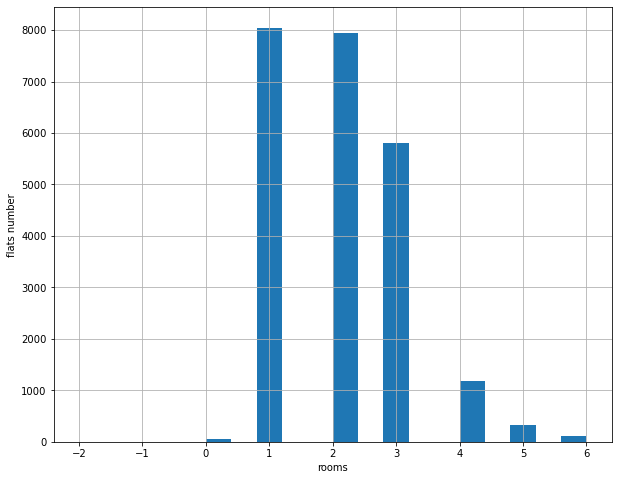

In [993]:
# количество комнат
plotting_for_analysis('rooms')

1. Квартир с 1, 2 и 3 комнатами на много больше, нежели квартир с прочик количеством комнат.
2. Больше всего продаётся двушек
3. Квартир-студий крайне мало в сравнени с прочим числом квартир, это можно утверждать на основании числа квартир без комнат.
4. Число квартир с 4 комнатами резко отличается от количества трешек. В то же время число квартир с 5 комнатамии и более вовсе крайне мало.

count    14432.000000
mean         2.771334
std          1.263884
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


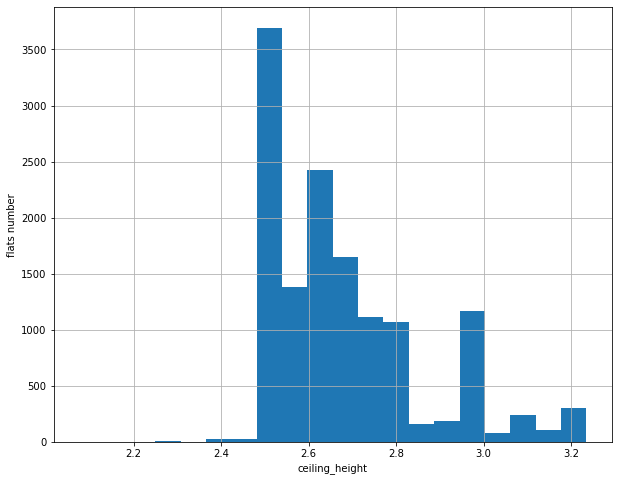

In [994]:
# высота потолков
plotting_for_analysis('ceiling_height')

1. Наибольшее число квартир с высотой потолков от 2.5 до 2.8 метров. Квартир с высотой потолков 3 метра так же достаточно много.
2. Больше всего квартир с высотой потолков близким к 278 см.
3. Квартиры с высотой потолков менее 2.5 метров были признаны аномальными и устранены в ходе работы. В целом график подтверждает  гипотезу об аномальности.
4. Квартир с высотой потолков около 2.9 и более 3.05 метров так же очень мало.

count    23561.000000
mean         5.879207
std          4.875000
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


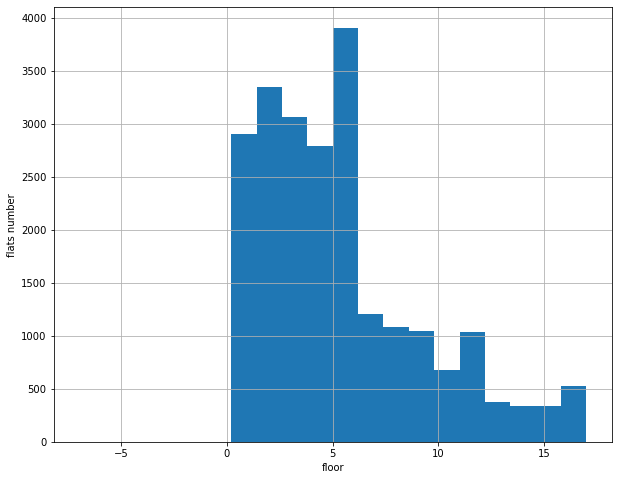

In [995]:
# этаж квартиры
plotting_for_analysis('floor')

1. Наибольшее число квартир продается на этажах с 1 по 6 включительно
2. больше всего квартир продается на 6 этаже
3. Квартир на этажах выше 6-го продаётся сильно меньше, чем не первых шести <br>
Скорее всего это связано с малым количеством домов в которых более 6 этажей

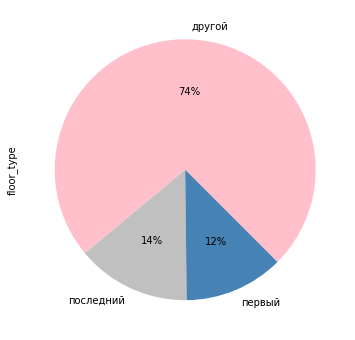

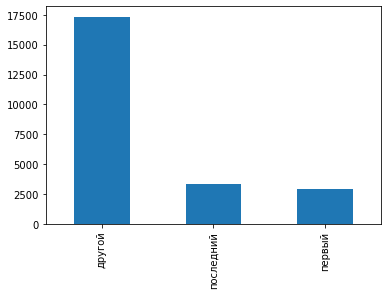

In [996]:
# тип этажа квартиры («первый», «последний», «другой»)
# Считаю, что в данном случае более наглядна будет круговая диаграмма, либо столбчатый график (так как значения изолированы),
# так как необходимо проследить доли от общего количества и между собой
# в случае малого количества показателей, круговая диаграмма будет лучшим выбором, нежели гистограмма
df['floor_type'].value_counts().plot(kind = 'pie',
                                     figsize=(6, 6),
                                     autopct='%1.0f%%', 
                                     colors = ['pink', 'silver', 'steelblue'],
                                     shadow = False,
                                     startangle = -45)
plt.show()
df['floor_type'].value_counts().plot(kind = 'bar')
plt.show()

1. Видно, что наибольшее число квартир продается на этажах не относящихся к первому и последнему.
2. На первом и последнем этажах продаётся практически одинаковое количество квартир

count    23478.000000
mean        10.639705
std          6.579811
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


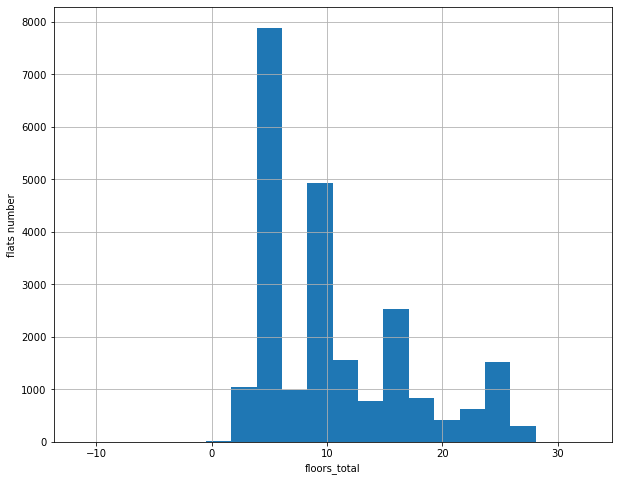

In [997]:
# общее количество этажей в доме
plotting_for_analysis('floors_total')

По графику видно, что наибольшее количество зданий высотой в 5 и в 9 этажей. Прочей высоты зданий явно меньше.

count    18093.000000
mean        14.189300
std          8.629579
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64


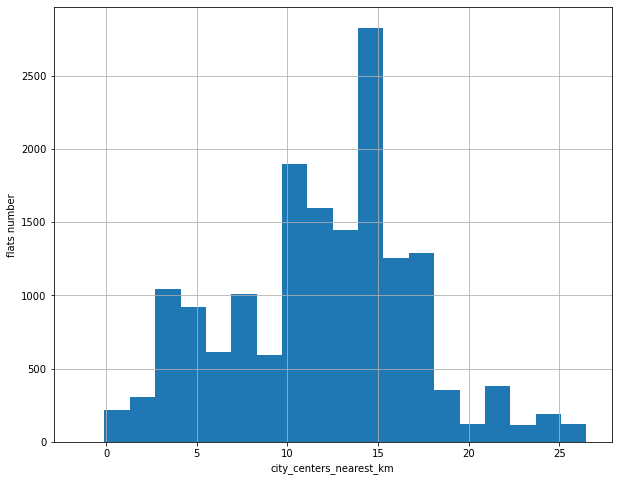

In [998]:
# расстояние до центра города в метрах
plotting_for_analysis('city_centers_nearest_km')

1. В среднем, продаваемое жилье находится на расстоянии от 13 до 15 км от центра города.
2. Так же достаточно много продаваемой недвижимости находится на расстоянии 5 км

count    18070.000000
mean     28816.740353
std      12627.927383
min       6450.000000
25%      18596.000000
50%      26756.500000
75%      37288.000000
max      84869.000000
Name: airports_nearest, dtype: float64


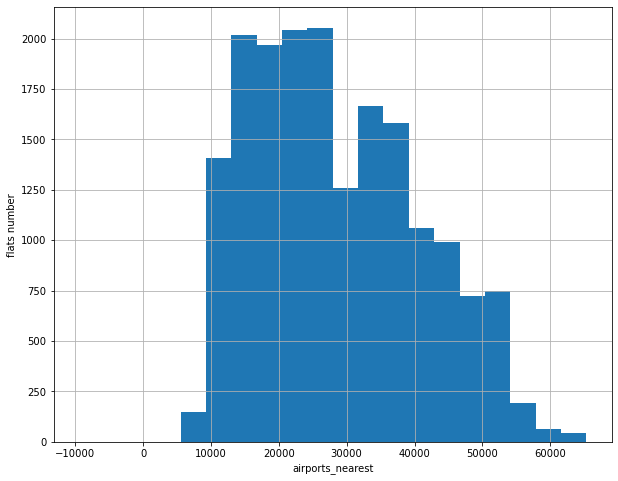

In [999]:
# расстояние до ближайшего аэропорта
plotting_for_analysis('airports_nearest')

В среднем, продаваемое жилье находится на расстоянии от 11 до 37км от ближайшего аэропорта.

count    8059.000000
mean      490.624767
std       342.355275
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


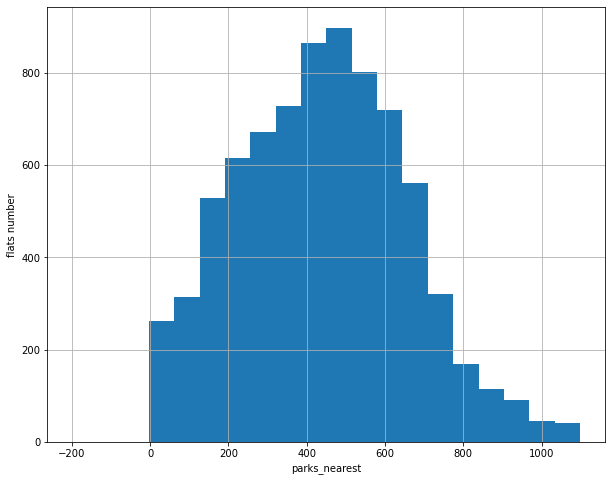

In [1000]:
# расстояние до ближайшего парка
plotting_for_analysis('parks_nearest')

1. В среднем, расстояние до ближайшего парка для большинства зданий находится в пределах от 350 до 600 метров.
2. Недвижимости, расположенной на расстоянии более километра до ближайшего парка крайне мало

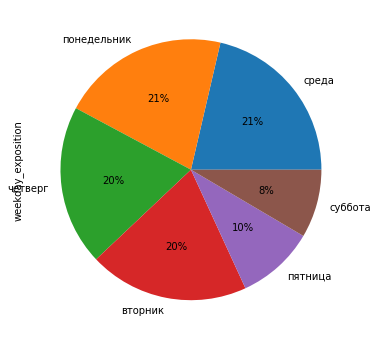

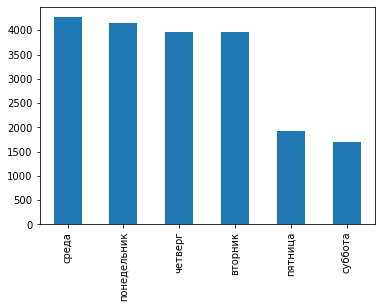

In [1001]:
# день публикации объявления
weekday_names = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
df['weekday_exposition'].map(weekday_names).value_counts().plot(kind = 'pie',
                                     figsize=(6, 6),
                                     autopct='%1.0f%%')
plt.show()
df['weekday_exposition'].map(weekday_names).value_counts().plot(kind = 'bar')
plt.show()

Наибольшее число объявлений было опубликовано в понедельник и среду, наименьшее - в пятницу и субботу.

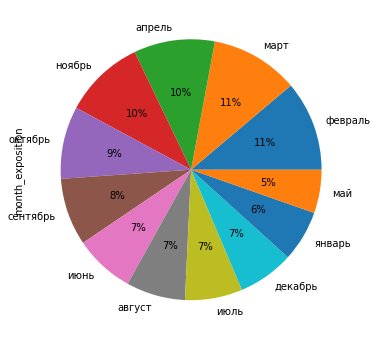

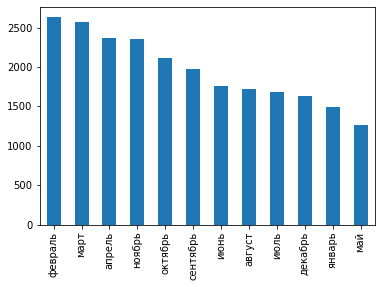

In [1002]:
# месяц публикации объявления
month_names = {1: 'январь', 2: 'февраль', 3: 'март', 4: 'апрель', 5: 'май', 6: 'июнь', 7: 'июль', 8: 'август', 9: 'сентябрь', 10: 'октябрь', 11: 'ноябрь', 12: 'декабрь'}
df['month_exposition'].map(month_names).value_counts().plot(kind = 'pie',
                                     figsize=(6, 6),
                                     autopct='%1.0f%%')
plt.show()
df['month_exposition'].map(month_names).value_counts().plot(kind = 'bar')
plt.show()

Наибольшее число объявлений было опубликовано в конце зимы - сердине весны (февраль, март, апрель), <br>
наименьшее - в конце весны - начале лета, а так же в январе.

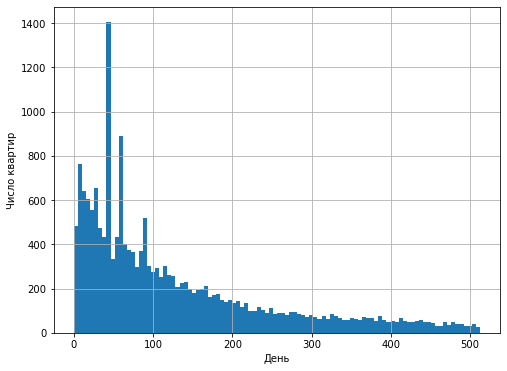

In [1003]:
q1 = df['days_exposition'].describe()['25%']
q3 = df['days_exposition'].describe()['75%']
iqr = q3 - q1

df['days_exposition'].hist(range = (0, q3+1.5*iqr), bins = 100, figsize = (8,6))
plt.xlabel('День')
plt.ylabel('Число квартир')
plt.show()

Очевидно, в большинстве своём, квартиры продаются в первые 50 - 100 дней с момента выставления объявления. Позднее же, количество продаваемых квартир снижается.<br> <br>
В начале графика (первые 100 значений) виден ряд значений, выбивающихся из общего представления.

In [1004]:
df['days_exposition'].value_counts().head(10)

45.0    879
60.0    534
7.0     231
90.0    204
30.0    202
4.0     174
3.0     156
5.0     149
14.0    146
9.0     143
Name: days_exposition, dtype: int64

Значения за 30, 45, 60 и 90 дни крайне сильно выбиваются из общей картины. Скорее всего это связано не с продажей недвижимости в эти дни, а с работой сайта (каждое из чисел крано  пятнадцати, наталкивает на мысль о том, что сайты в автоматическом порядке раз в 15 суток удаляют объявления, если пользователь заблаговременно не предпримет меры). <br>
Так же в глаза бросается значение за 7 день. Так же можно предположить, что объявления недельной давности либо убираются пользователем, либо сайтом.<br>
В любом случае такие значения могут негативно влиять на дальнейший анализ данных, их необходимо удалить.

In [1005]:
df = df[(df['days_exposition'] != 7) & 
        (df['days_exposition'] != 30) & 
        (df['days_exposition'] != 45) & 
        (df['days_exposition'] != 60) & 
        (df['days_exposition'] != 90)]
# df.query('days_exposition != 45', inplace = True) # Не помогло
# df.drop(df[df['days_exposition'] == 45 ].index, inplace = True) # Тоже не помогло

In [1006]:
# подсчет медианы и среднего
print('Среднее =', df['days_exposition'].mean())
print('Медиана =', df['days_exposition'].median())

Среднее = 188.20955371390332
Медиана = 104.0


count    19427.000000
mean       188.209554
std        222.980184
min          1.000000
25%         45.000000
50%        104.000000
75%        245.000000
max       1580.000000
Name: days_exposition, dtype: float64


(0.0, 700.0)

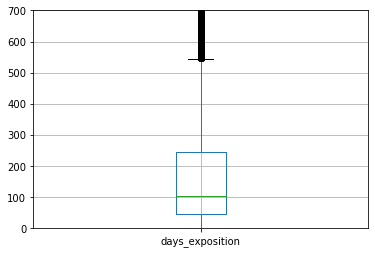

In [1007]:
#Категоризируем данные
print(df['days_exposition'].describe())
df.boxplot('days_exposition')
plt.ylim(0, 700)

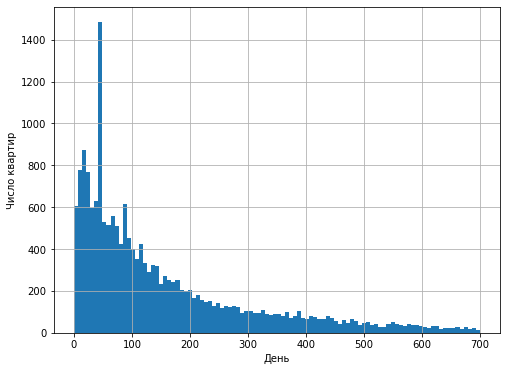

In [1008]:
df['days_exposition'].hist(range = (0, 700), bins = 100, figsize = (8,6))
plt.xlabel('День')
plt.ylabel('Число квартир')
plt.show()

**Вывод по скорости продаж квартир** <br>
В целом можно сказать, что сильное большинство квартир продается в первые 50 дней после того, как объявление выложено. В связи с чем, нельзя точно назвать значение, до которого продажи можно считать быстрыми. Квартиры же, висящие на сайте более 600 дней следует относить к аномально долгим. В среднем же продажа квартиры занимает примерно до 250 дней.

**Какие факторы больше всего влияют на полную стоимость объекта:**

In [1009]:
df.columns

Index(['index', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'city_centers_nearest', 'parks_around_three_km', 'parks_nearest',
       'ponds_around_three_km', 'ponds_nearest', 'days_exposition',
       'square_meter_price', 'weekday_exposition', 'month_exposition',
       'year_exposition', 'floor_type', 'city_centers_nearest_km'],
      dtype='object')

0.6544678437328844


<AxesSubplot:xlabel='total_area'>

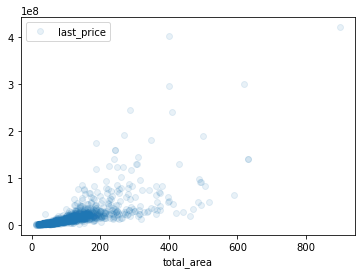

In [1010]:
price_vs_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'mean')
print(df['last_price'].corr(df['total_area']))
price_vs_total_area.plot(style = 'o', alpha = 0.1)

По графику хорошо прослеживается корреляция для квартир, чья площадь меньше трёхсот метров. об этом же говорит и коэффициент Пирсона равный 0.7 на всём множестве.

0.6544678437328844
0.9397832845933203


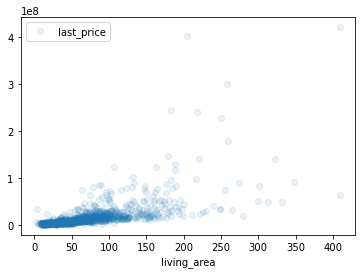

In [1011]:
price_vs_living_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = 'mean')
print(df['last_price'].corr(df['total_area']))
price_vs_living_area.plot(style = 'o', alpha = 0.1)
print(df['living_area'].corr(df['total_area']))

Ситуация аналогична предыдущей. Это происходит из-за очень высокой корреляции между жилой площадью и площадью всей квартиры.

0.5217623574803218
0.6113276214133673


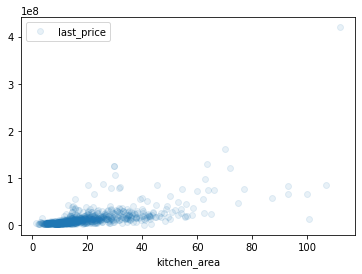

In [1012]:
price_vs_kitchen_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = 'mean')
print(df['last_price'].corr(df['kitchen_area']))
price_vs_kitchen_area.plot(style = 'o', alpha = 0.1)
print(df['kitchen_area'].corr(df['total_area']))

На этот раз корреляция между значениями цены и территорией кцхни меньше, а точки раскиданы на большем расстоянии друг от друга. Делаем вывод: площадь кухни оказывает меньшее воздействие на стоимость квартиры.

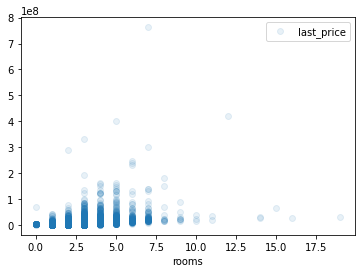

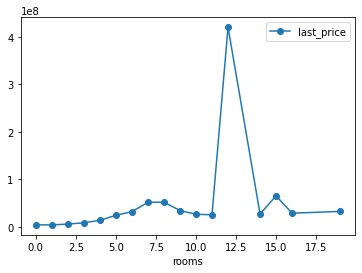

0.3651352177207829
0.7584199162498959


In [1013]:
df.plot(x = 'rooms', y = 'last_price', style='o', alpha=0.1)
plt.show()
price_vs_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
price_vs_rooms.plot(style = 'o-')
plt.show()
print(df['last_price'].corr(df['rooms']))
print(df['rooms'].corr(df['total_area']))

Из графиков видно, что между ценой и числом комнать наблюдается прямая зависимость, но это верно лишь для квартир с числом комнат до восьми включительно. Однако эта зависимость достаточно слаба.

<AxesSubplot:xlabel='floor_type'>

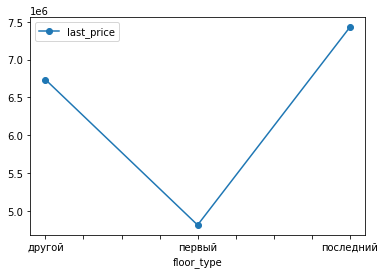

In [1014]:
price_vs_floor_type = df.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'mean')
price_vs_floor_type.plot(style = 'o-')

Исходя из графика, цена квартиры увеличивается в зависимости от этажа. Так на первом этаже цена наименьшая, на последнем наибольшая.

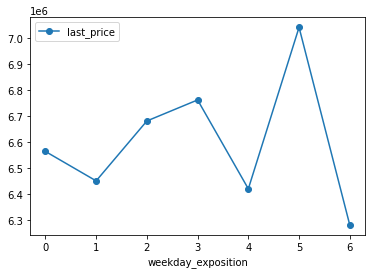

0.0013180802060022917


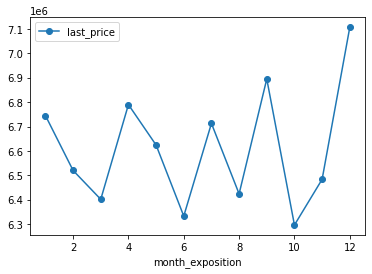

0.002924357634227181


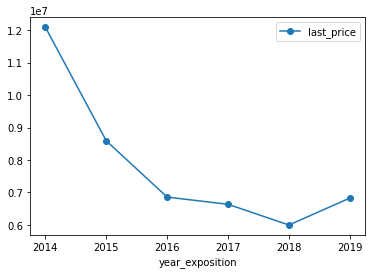

-0.04246890366504764


In [1015]:

price_vs_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = 'mean')
price_vs_weekday_exposition.plot(style = 'o-')
plt.show()
print(df['last_price'].corr(df['weekday_exposition']))

price_vs_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = 'mean')
price_vs_month_exposition.plot(style = 'o-')
plt.show()
print(df['last_price'].corr(df['month_exposition']))

price_vs_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'mean')
price_vs_year_exposition.plot(style = 'o-')
plt.show()
print(df['last_price'].corr(df['year_exposition']))

1. В выходные люди выставляют квартиры по более низкой цене, нежели в будни.
2. Рассматривая данные помесячно, сезонности выявить не удалось.
3. Исходя из данных, цена квартир с течением лет снизилась, однако это связано исключительно с кризисом на рынке жилья, имевшим начало в 2014 году.

**Общий вывод**<br>
В целом можно отметить, что цена квартиры сильнее всего зависит от факторов площади. В первую очередь, это площадь помещения целиком, далее идёт жилая площадь и соответственно количество комнат в квартире, после чего следует площадь кухни. Такие факторы, как этаж и время время в которое квартира была выставлена на продажу оказывают сильно меньшее влияние на цену квартиры. (в данном случае не учитываются внешние и политические факторы).

In [1016]:
most_ads = df.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc=['count', 'mean'])
most_ads.columns = ['count', 'mean_square']
most_ads = most_ads.sort_values('count').tail(10)
most_ads.drop(['count'], axis=1, inplace = True)
most_ads.sort_values(by = 'mean_square', ascending = False)

,mean_square
locality_name,
Санкт-Петербург,115097.632705
Пушкин,103455.209040
деревня Кудрово,95102.018265
посёлок Парголово,90174.919355
посёлок Мурино,85566.444444
посёлок Шушары,78357.793689
Колпино,75506.527439
Гатчина,68556.871622
Всеволожск,68465.785340


<AxesSubplot:xlabel='locality_name'>

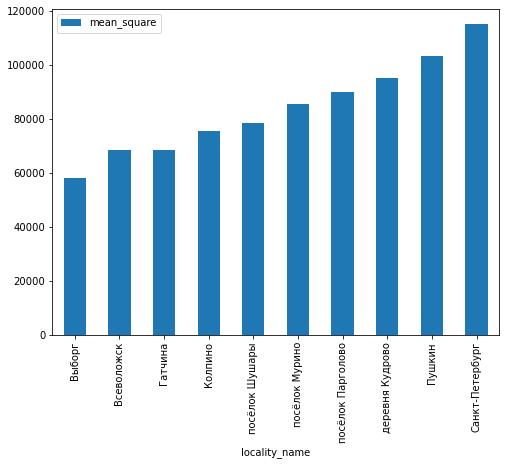

In [1017]:
most_ads.sort_values(by='mean_square').plot(kind='bar', figsize=(8, 6))

Наибольшая цена за квадратный метр непосредственно в северной столице, следом идет город Пушкин. Замыкает десятку Всеволожск.
В принципе достаточно логичное распределение, чем больше капитала сосредоточено в городе и чем ближе к его границам расположен другой город, тем дороже и стоимость недвидимости в нём.

In [1018]:
piter = df[df['locality_name'] == 'Санкт-Петербург']
piter.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_three_km,parks_nearest,ponds_around_three_km,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой,16.0
2,2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
3,3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой,7.0
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
7,7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110545.0,3,4,2019,другой,12.0


In [1019]:
piter_cost = piter.pivot_table(index = 'city_centers_nearest_km', values = 'square_meter_price')
piter_cost.tail()

,square_meter_price
city_centers_nearest_km,
25.0,90512.708333
26.0,89791.365385
27.0,132115.500000
28.0,81161.857143
29.0,72953.500000


<AxesSubplot:xlabel='city_centers_nearest_km'>

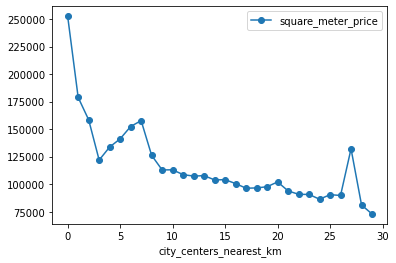

In [1020]:
piter_cost.plot(style = 'o-')

In [1021]:
piter.query('city_centers_nearest_km == 27')['last_price'].count()

2

График можно разделить на две области. Первая - до 8км от центра, зона с возможныим историческими зданиями, либо просто недвижимостью высокого уровня, в связи с этим, цена в этой зоне достаточно нестабильна. Вторая зона - после 8 км, здесь хорошо видна зависимость снижения цены за квадратный метр недвижимости при удалении от центра. на расстоянии 27 км от центра виден выброс. Выброс произошёл из-за того, что  на таком расстоянии расположена лишь одна квартира, которая, очевидно, является недвижимостью высокого класса. <br>
Самая высокая стоимость квадратного метра наблюдается в радиусе одного километра от центра города. Самая низкая - на расстоянии 28 км от центра. 

Вывод основан на двух ключевых параметрах: время продажи недвижимости и цена недвижимости. <br>
<br>
1. Среднее время продажи недвижимости - до 250 дней. 
2. Наибольшее влияние на стоимость квартиры оказывают внутренние факторы, в первую очередь, её полная площадь, а так же жилая площадь и количество комнат. Так же немаловажную роль играет расстояние то недвижимости до центра города. при чем стоимость квартиры в центре сильно превышает стоимость последней вне центра.<br>
    <br>
Так же в было обнаружено следующее:
- Средняя площадь недвижимости в Санкт-Петербурге и его окрестности находится в диапазоне от 35 до 65 квадратных метров.
- Средняя цена недвижимости в Санкт-Петербурге и его окрестности находится в диапазоне от 3млн до 5.5млн.
- Средняя высота потолков в Санкт-Петербурге и его окрестности - от 2.5м до 2.8м
- Наибольшее число недвижимости из объявлениий расположено на этажах с 1 по 6 включительно.
- В Санкт-Петербурге и его окрестности наибольшее число зданий в высоту - 5, либо 9 этажей.
- Наибольшее число недвижимости из объявлениий расположено на расстоянии от 13 до 15 км от центра ближайшего города.
- Наибольшее число недвижимости из объявлениий расположено на расстоянии от 11 до 37 км от ближайшего аэропорта.
- Наибольшее число недвижимости из объявлениий расположено на расстоянии от 350 до 600 м от ближайшего парка.
- Наибольшее число объявлений выставляется в конце зимы - середине весны.  Наименьшее же количество - в конце весны, начале лета и в середине зимы.
- Среди десяти населенных пунктов с наибольшим количеством объявлений, самая высокая стоимость квадратного метра недвижимости в Санкт-Петербурге, а самая низкая во Всеволожске.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены графики для каждого параметра
- [x]  Изучено, как быстро продавались квартиры.
- [x]  Выявлены факторы больше всего влияющие на общую (полную) стоимость объекта. Построены графики, которые показывают зависимость цены от указанных ниже параметров.
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  Вычислена средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выделены квартиры в Санкт-Петербурге и вычислена средняя цена каждого километра. Описано, как стоимость объектов зависит отт расстояния до центра города.
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод